In [2]:
df<-read.csv('d:/data/rides/rides2.csv')
head(df)

weekend,num.child,distance,rides,games,wait,clean,overall,class
1,0,114.64826,87,73,60,89,47,0
1,2,27.01410,87,78,76,87,65,1
0,1,63.30098,85,80,70,88,61,1
1,0,25.90993,88,72,66,89,37,0
0,4,54.71831,84,87,74,87,68,1
0,5,22.67934,81,79,48,79,27,0


In [3]:
library(dplyr)
df<-df %>% select(-overall)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 500   8

weekend,num.child,distance,rides,games,wait,clean,class
1,0,114.64826,87,73,60,89,0
1,2,27.01410,87,78,76,87,1
0,1,63.30098,85,80,70,88,1
1,0,25.90993,88,72,66,89,0
0,4,54.71831,84,87,74,87,1
0,5,22.67934,81,79,48,79,0



  0   1 
262 238 

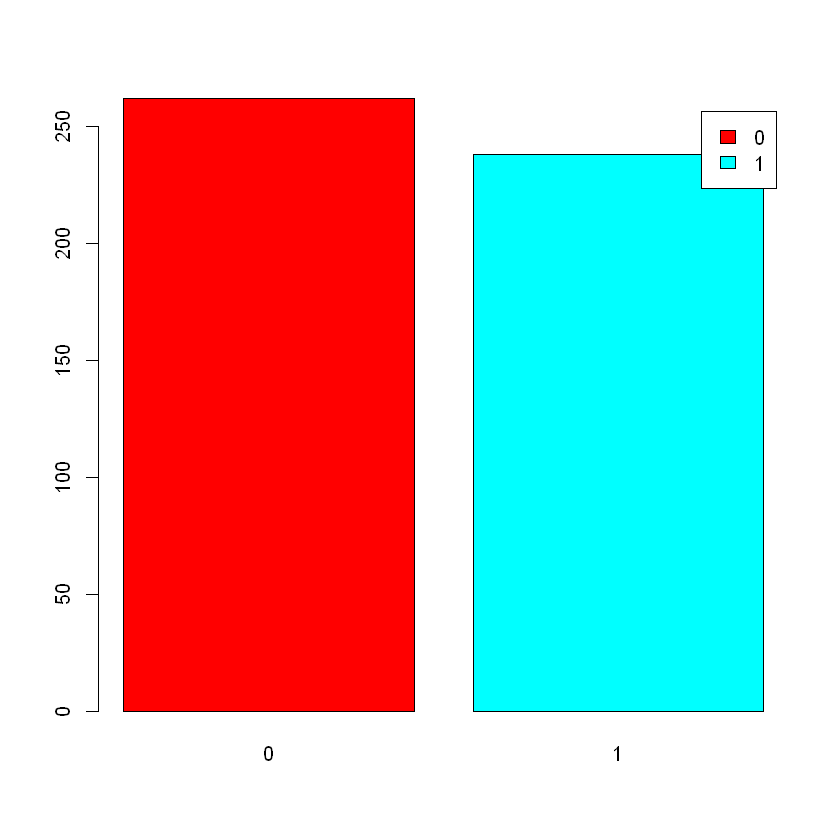

In [6]:
(tbl<-table(df$class))
barplot(tbl,beside=T,legend=T,col=rainbow(2)) #카운트 플롯

In [7]:
library(ROSE)
df_samp<-ovun.sample(class~ . , data=df, seed=1, method='under',
                    N=238*2)$data
(tbl<-table(df_samp$class))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
238 238 

In [11]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df$class, p=0.8,list=F)
train<-df[idx_train,]
X_train<-train[,-8]
y_train<-train[,8]
test<-df_samp[-idx_train,]
X_test<-test[,8]
y_test<-test[,8]

k,accuracy
1,0.9139785
2,0.8172043
3,0.8064516
4,0.8172043
5,0.7526882
6,0.7419355
7,0.7419355
8,0.7419355
9,0.7526882
10,0.7526882


k,accuracy
1,0.9139785


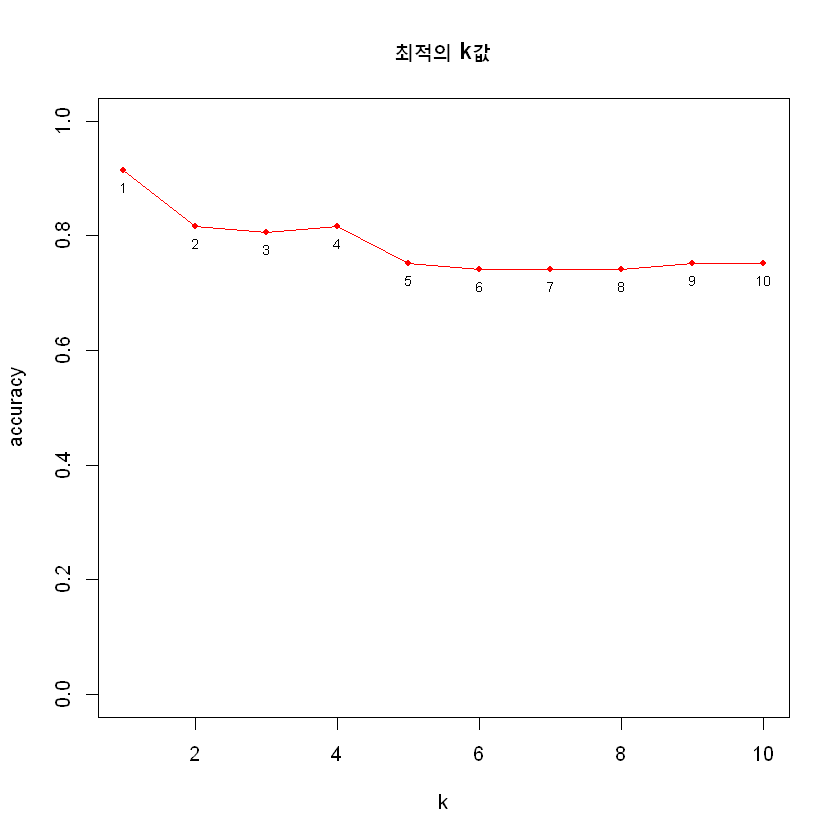

In [14]:
library(class)
acc<-NULL
for ( i in c(1:10)){
    set.seed(123)
    pred=knn(train=train,test=test,cl=y_train,k=i)
    acc<-c(acc,mean(y_test == pred))
}
df<-data.frame(k=c(1:10), accuracy=acc)
plot(accuracy ~ k , data=df, type='o',pch=20, main='최적의 k값',
    ylim=c(0,1),col='red')
with(df,text(accuracy ~ k, labels=c(1:10),pos=1,cex=0.7))
df
n<-min(df[df$accuracy %in% max(acc),'k'])
df[n,]

In [13]:
library(class)
set.seed(123)
pred<-knn(train=train, test=test, cl=y_train, k=n)
table(y_test,pred)
mean(y_test==pred)

      pred
y_test  0  1
     0 44  3
     1  5 41

[1] 0.9139785